<a href="https://colab.research.google.com/github/PSingla-ds/DLCVNLP_ineuron/blob/main/11_sep_perceptron_AND_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
root = '/content/drive/MyDrive/DLCVNLP_aug_files'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir(root)

In [5]:
with open('test.txt', 'w') as f:
  f.writelines('hello preeti')

In [6]:
!pwd

/content/drive/My Drive/DLCVNLP_aug_files


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib # to save the model as a binary file
from matplotlib.colors import ListedColormap

plt.style.use('fivethirtyeight')

In [15]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4
    print(f"initial weights before training: {self.weights}")
    self.eta = eta
    self.epochs = epochs

  def activationFunction(self, inputs, weights):
    z = np.dot(inputs, weights)
    return np.where(z>0, 1, 0) # step activation function 
    

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
    print(f"X with bias: {X_with_bias}")

    for epoch in range(self.epochs):
      print("--"* 10)
      print(f'for epoch: {epoch}')
      print("--"* 10)
      
      y_hat = self.activationFunction(X_with_bias, self.weights)  # forward propagation
      print(f"predicted value after forward pass: {y_hat}")

      self.error = self.y - y_hat
      print(f"error: {self.error}")
      
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
      print(f"updated weights after epoch: \n{epoch}/{self.epochs}: \n{self.weights}")
      print("######" * 10)


  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(X), 1))]
    return self.activationFunction(X_with_bias, self.weights)

  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f"total loss: {total_loss}")
    return total_loss

In [16]:
def prepare_data(df):
  X = df.drop('y', axis = 1)
  y = df['y']
  return X, y

In [42]:
AND = { 
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y': [0,0,0,1]
       }

df_and = pd.DataFrame(AND)
df_and

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [44]:
X, y = prepare_data(df_and)

ETA = 0.3
EPOCHS = 10

model_and = Perceptron(eta = ETA, epochs = EPOCHS)
model_and.fit(X, y)

_ = model_and.total_loss()

initial weights before training: [ 1.15952377e-04  3.82726488e-05 -8.38763099e-05]
X with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: [1 1 1 1]
error: 0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 
0/10: 
[-0.29988405 -0.29996173  0.89991612]
############################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: [0 0 0 0]
error: 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 
1/10: 
[1.15952377e-04 3.82726488e-05 5.99916124e-01]
############################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: [0 0 0 0]
error: 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 
2/10: 
[0.30011595 0.30003827 0.29991612]
################

In [45]:
model_and.predict(X)

array([0, 0, 0, 1])

In [46]:
input = np.array([[1,1], [1,0]])
model_and.predict(input)

array([1, 0])

In [47]:
def save_model(model, filename):
  model_dir = 'models'
  os.makedirs(model_dir, exist_ok = True) # only create if model_dir does not exist
  filePath = os.path.join(model_dir, filename)
  joblib.dump(model, filePath)

In [48]:
save_model(model_and, 'and.model')

In [49]:
loaded_model = joblib.load("models/and.model")
loaded_model.predict(input)

array([1, 0])

# OR Gate

In [50]:
OR = { 
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y': [0,1,1,1]
       }

df_or = pd.DataFrame(OR)
df_or

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [51]:
X, y = prepare_data(df_or)

ETA = 0.3
EPOCHS = 10

model_OR = Perceptron(eta = ETA, epochs = EPOCHS)
model_OR.fit(X, y)

_ = model_OR.total_loss()

initial weights before training: [-3.49522478e-05  1.99974588e-05  1.38449783e-05]
X with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: [0 1 0 0]
error: 0    0
1    0
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 
0/10: 
[ 0.59996505  0.30002    -0.59998616]
############################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: [1 1 1 1]
error: 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 
1/10: 
[ 0.59996505  0.30002    -0.29998616]
############################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: [1 1 1 1]
error: 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 
2/10: 
[5.99965048e-01 3.00019997e-01 1.38449783e-05]
#############

# XOR

In [52]:
XOR = { 
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y': [0,1,1,0]
       }

df_xor = pd.DataFrame(XOR)
df_xor

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [53]:
X, y = prepare_data(df_xor)

ETA = 0.3
EPOCHS = 10

model_XOR = Perceptron(eta = ETA, epochs = EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()

initial weights before training: [1.22578279e-05 2.55055244e-05 9.22564059e-05]
X with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: [0 0 0 0]
error: 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 
0/10: 
[ 0.30001226  0.30002551 -0.59990774]
############################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: [1 1 1 1]
error: 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 
1/10: 
[1.22578279e-05 2.55055244e-05 9.22564059e-05]
############################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: [0 0 0 0]
error: 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 
2/10: 
[ 0.30001226  0.30002551 -0.59990774]
################

In [66]:
def save_plot(df, file_name, model):
  def _create_base_plot(df):
    df.plot(kind = 'scatter', x = 'x1', y = 'x2', c='y', s= 100, cmap = 'winter')
    plt.axhline(y=0, color= 'black', linestyle='--', linewidth= 1)
    plt.axvline(x=0, color= 'black', linestyle= '--', linewidth=1)
    figure = plt.gcf() # get current figure
    figure.set_size_inches(10,8)

  def _plot_decision_regions(X, y, classifier, resolution = 0.2):
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])

    X = X.values
    x1 = X[:, 0]
    x2 = X[:,1]
    x1_min, x1_max = x1.min()-1, x1.max()+1
    x2_min, x2_max = x2.min()-1, x2.max()+1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    print(xx1)
    print(xx1.ravel())
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.plot()

  X, y = prepare_data(df)
  _create_base_plot(df)
  _plot_decision_regions(X, y, model)

  plot_dir = 'plots'
  os.makedirs(plot_dir, exist_ok= True)
  plotPath= os.path.join(plot_dir, file_name)
  plt.savefig(plotPath)



# plots

[[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
  -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
   6.00000000e-01  8.00000000e-01  1.00000000e+00  1.20000000e+00
   1.40000000e+00  1.60000000e+00  1.80000000e+00]
 [-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
  -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
   6.00000000e-01  8.00000000e-01  1.00000000e+00  1.20000000e+00
   1.40000000e+00  1.60000000e+00  1.80000000e+00]
 [-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
  -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
   6.00000000e-01  8.00000000e-01  1.00000000e+00  1.20000000e+00
   1.40000000e+00  1.60000000e+00  1.80000000e+00]
 [-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
  -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
   6.00000000e-01  8.00000000e-01  1.00000000e+00  1.20000000e+00
   1.40000000e+00  1.60000000e+00  1.80000000e+00]
 [-1

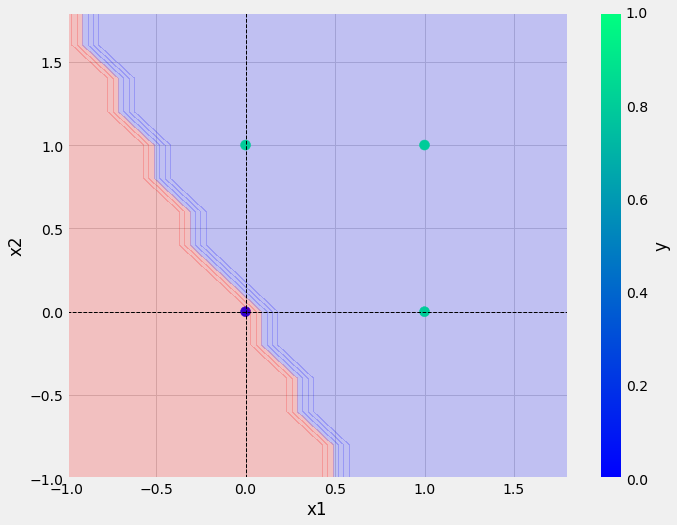

In [67]:
save_plot(df_or, 'or.png', model_OR)

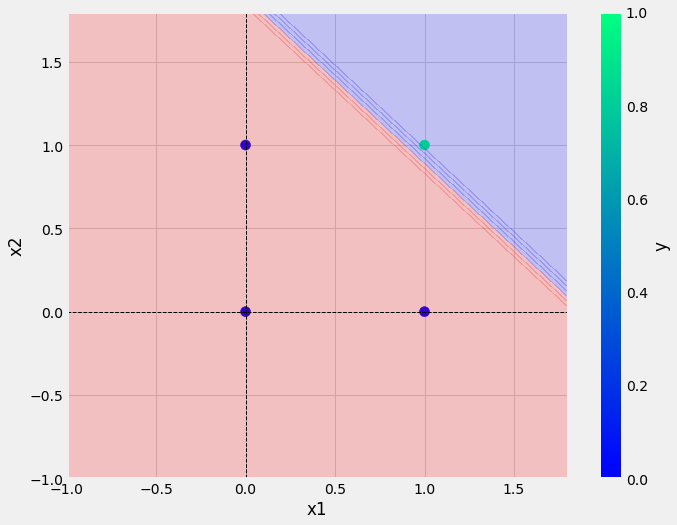

In [65]:
save_plot(df_and, 'and.png', model_and)

[[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
  -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
   6.00000000e-01  8.00000000e-01  1.00000000e+00  1.20000000e+00
   1.40000000e+00  1.60000000e+00  1.80000000e+00]
 [-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
  -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
   6.00000000e-01  8.00000000e-01  1.00000000e+00  1.20000000e+00
   1.40000000e+00  1.60000000e+00  1.80000000e+00]
 [-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
  -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
   6.00000000e-01  8.00000000e-01  1.00000000e+00  1.20000000e+00
   1.40000000e+00  1.60000000e+00  1.80000000e+00]
 [-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
  -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
   6.00000000e-01  8.00000000e-01  1.00000000e+00  1.20000000e+00
   1.40000000e+00  1.60000000e+00  1.80000000e+00]
 [-1

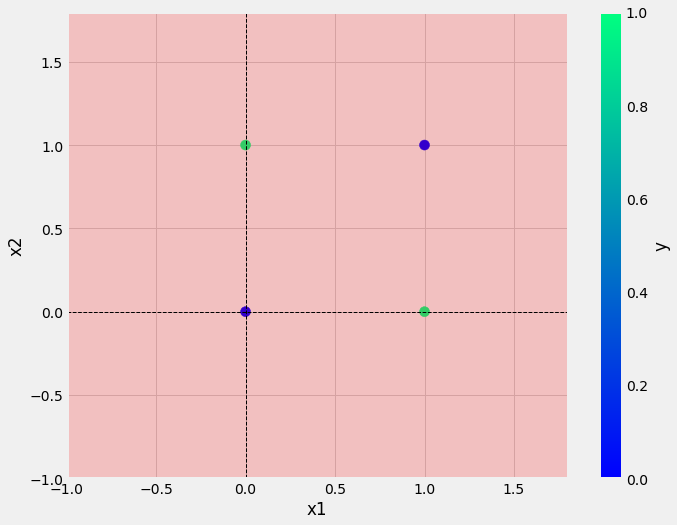

In [68]:
save_plot(df_xor, 'xor.png', model_XOR)